# Working with Titanic Survival

## Instructions

1. Download the file "titanic.csv" from the "Week 4" module on canvs.
2. Make sure that you put the file in the same working directory as this notebook. 
3. Follow the instructions below.

## Getting Started: Exploratory Data Analysis

In cells below,

1. Import pandas as pd
2. Import seaborn as sns
3. Figure out how to import a DecisionTreeClassifier from sklearn, then import it. 

In [2]:
## import statements go here
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

## Getting an Understanding of the Data
In the cell below, use the [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) command from pandas to read the titanic-survival.csv file as a data frame. Be sure to save the data frame as something! 

In [3]:
## read the file into a data frame here. 
titanic = pd.read_csv('titanic-survival.csv')
titanic.shape

(891, 12)

Use the [columns](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html) attribute to see the names of the columns. 

In [4]:
## Python code to see columns goes here.  
cols = titanic.columns
cols

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Now use the [isna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html#pandas.DataFrame.isna) and [sum()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html) commands to see how many missing values there are for each column. 

In [5]:
## use the pandas isna and sum commands here 
print('\033[4m%-11s | %s\033[0m' % ('Column', 'Missing Values'))
for c in cols:
    s = sum(titanic[c].isna())
    print('%-11s | %d' % (c, s))

Column      | Missing Values
PassengerId | 0
Survived    | 0
Pclass      | 0
Name        | 0
Sex         | 0
Age         | 177
SibSp       | 0
Parch       | 0
Ticket      | 0
Fare        | 0
Cabin       | 687
Embarked    | 2


Now, do the following preprocessing steps: 
1. Choose one column to drop based on the missing values, using the [dropna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) command. 
2. Choose another column to replace missing values in a way you choose (using the [fillna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) command.  

In [6]:
# Will drop Cabin
titanic.dropna(axis = 'columns', thresh = 600, inplace = True)

# Drops the two rows without Embarked
titanic.dropna(axis = 0, inplace = True)

# Makes age -1 if it is missing
titanic.fillna(value = {'Age': -1}, inplace = True)

In [37]:
survived_tot = titanic['Survived'].sum()
survived_per = titanic['Survived'].mean()  # percentage survived

print(survived_tot, 'survived.', '%.2f' % (survived_per * 100) ,'\b%')

288 survived. 40.45%


In [59]:
# Finding how many and what percentage of Pclass 3 survived
p3_sur = titanic[titanic['Pclass'] == 3]['Survived'].sum()
p3_per = titanic[titanic['Pclass'] == 3]['Survived'].mean()

# Finding how many and what percentage of Pclass 2 survived
p2_sur = titanic[titanic['Pclass'] == 2]['Survived'].sum()
p2_per = titanic[titanic['Pclass'] == 2]['Survived'].mean()

# Finding how many and what percentage of Pclass 1 survived
p1_sur = titanic[titanic['Pclass'] == 1]['Survived'].sum()
p1_per = titanic[titanic['Pclass'] == 1]['Survived'].mean()

print('Percentage Surived by Class:')
print('P1:', '%.2f' % (p1_per * 100), '\b%\nP2:', '%.2f' % (p2_per * 100), '\b%\nP3:', '%.2f' % (p3_per * 100), '\b%')

Percentage Surived by Class:
P1: 65.22%
P2: 47.98%
P3: 23.94%


In [61]:
# Shows survival percent by 
titanic.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.652174
2    0.479769
3    0.239437
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Survived'>

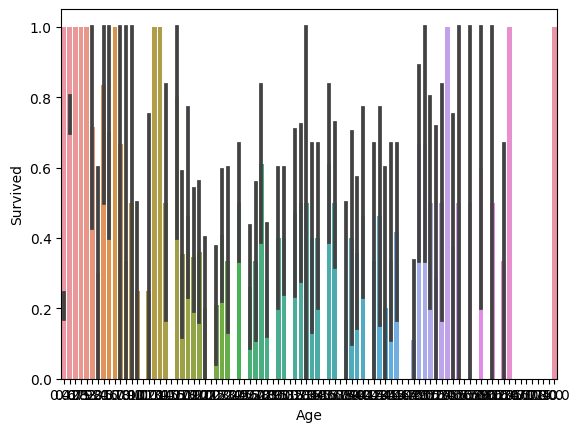

In [66]:
sns.barplot(data = titanic, x = 'Sex', y = 'Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

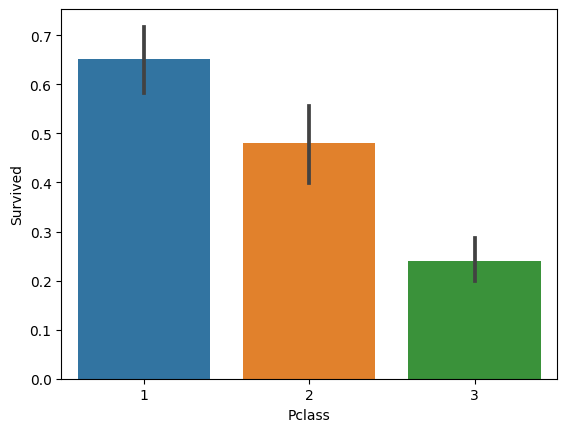

In [68]:
sns.barplot(data = titanic, x = 'Pclass', y = 'Survived')

## Getting a Sense of Survival Based on Different Attributes 

Dr. Penland will show some things here using numerical and graphical methods to understand the data set. 

## Building a DecisionTreeClassifier to predict survival. 